# Wrangling and Analysis of WeRateDogs data 
Noura Shebl 

In this project I will gather, assess, clean, analyze and visualize the dataset of the twitter archive 'WeRateDogs'.

In [8]:
#import python libraries
import pandas as pd
import numpy as np 
import tweepy
from tweepy import OAuthHandler
import requests
import json
import os
import re
import matplotlib.pyplot as plt
import datetime
from bs4 import BeautifulSoup
from timeit import default_timer as timer

## Gathering Data 

In this section I will gather three separate files:
<br> 1- The provided twitter archive for WeRateDogs. 
<br> 2- The image prediction data to be downloaded from Udacity's website. 
<br> 3- Tweet data gathered from tweepy API.

In [4]:
#Read the provided twitter archive
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
#Download the image file programmatically
file_url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(file_url)
with open(os.path.join(file_url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [7]:
#Read the Image file
image_dogs = pd.read_csv('image-predictions.tsv',sep='\t')

In [21]:
#Storing the tweet data into a file called twt_data 
twt_id = []
favec = []
rets = []
with open('tweet_json.txt', mode = 'r') as f:
     for line in f.readlines():
            tweet_data = json.loads(line)
            twt_id.append(tweet_data['id'])
            favec.append(tweet_data['favorite_count'])
            rets.append(tweet_data['retweet_count'])
            
twt_data = pd.DataFrame({'tweet_id':twt_id, 'favorite_count':favec, 'retweet_count':rets})

## Assessing Data 

Assessing twitter_archive table 

In [22]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [24]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [25]:
twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Lola             10
Penny            10
Tucker           10
Winston           9
Bo                9
the               8
Sadie             8
an                7
Buddy             7
Bailey            7
Toby              7
Daisy             7
Oscar             6
Milo              6
Dave              6
Scout             6
Koda              6
Jax               6
Bella             6
Leo               6
Stanley           6
Rusty             6
Jack              6
Gus               5
               ... 
Sailer            1
Tom               1
Oreo              1
Binky             1
Linus             1
BeBe              1
Hanz              1
Rufio             1
Aubie             1
Berb              1
Blipson           1
Willem            1
Stewie            1
Lilah             1
Filup             1
Alexanderson      1
Farfle            1
Bloo              1
Grey              1


In [27]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
twitter_archive[twitter_archive['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Assessing image_dogs table

In [29]:
image_dogs

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [30]:
image_dogs.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
image_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_dogs[image_dogs['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [33]:
image_dogs.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [34]:
image_dogs.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
teddy                         18
beagle                        18
Maltese_dog                   18
Eskimo_dog                    18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

Assessing twt_data table

In [35]:
twt_data

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [36]:
twt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [37]:
twt_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [38]:
twt_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [39]:
twt_data[twt_data['tweet_id'].duplicated()]

,tweet_id,favorite_count,retweet_count


Tidiness:
<br> 1- twitter_archive table: The 4 columns for dog types doggo, poppy, pupper and floofer should be in a single column called dog type.
<br> 2- The three tables should be all in one dataframe.

Quality
<br>1-Data type of tweet_id to string and Data type of timestamp to datetime.
<br>2-Retweet enteries to be removed
<br>3-Enteries without images (jpg_url) are to be removed
<br>4-The text in p1, p2 and p3 to be all in lower case
<br>5-Redundant columns to be removed
<br>6-Columns containing all null values to be removed.
<br>7-A new ratio column in the final table
<br>8-"a" in name of dogs to None, because "a" is not a name


## Cleaning Data 

### Tidiness

<br>Define 
    <br> 1- Melt poppo, pupper, doggo, floof into a single column called dog_type

Code

In [85]:
# Creating clean dataframes to clean-up
twitter_archive_new = twitter_archive.copy()
twt_data_new = twt_data.copy()
image_dogs_new = image_dogs.copy()

In [88]:
# melt the 'dog type' columns into one
dog_type = []

string_in = ['puppo', 'pupper', 'doggo', 'floof']
string_out = ['puppo', 'pupper', 'doggo', 'floofer']

for row in twitter_archive_new['text']:
    row = row.lower()
    for word in string_in:
        if word in str(row):
            dog_type.append(string_out[string_in.index(word)])
            break
    else:
        dog_type.append('None')

twitter_archive_new['dog_type'] = dog_type
twitter_archive_new['dog_type'].value_counts()

None       1905
pupper      283
doggo        93
puppo        38
floofer      37
Name: dog_type, dtype: int64

In [89]:
#delete redundant columns
twitter_archive_new.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

Test

In [90]:
twitter_archive_new.dog_type.value_counts()

None       1905
pupper      283
doggo        93
puppo        38
floofer      37
Name: dog_type, dtype: int64

<b>Define:
<br> 2- Merge the three tables together

<b> Code 

In [91]:
#Merge twitter_archive_new & twt_data_new from api.
#'inner'is needed to incldue only tweets that are in both tables.

twitter_archive_new = pd.merge(twitter_archive_new, twt_data_new, on = ['tweet_id'], how = 'inner')

In [92]:
twitter_archive_new = pd.merge(twitter_archive_new, image_dogs_new, on ='tweet_id', how = 'inner')

<b> Test

In [93]:
twitter_archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
dog_type                      2073 non-null object
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 no

### Quality

Define
<br> 1- change the data type of tweet_id to string and data type of timestamp to datetime.

<b> Code

In [98]:
#convert tweet_id to string
twitter_archive_new.tweet_id = twitter_archive_new.tweet_id.astype('str')

#converting timestamp to datetime
twitter_archive_new.timestamp = pd.to_datetime(twitter_archive_new.timestamp)

<b> Test

In [99]:
twitter_archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
dog_type                      2073 non-null object
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
jpg_url                       2073 non-null object
img_num                     

In [100]:
twitter_archive_new.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


<b>Define
<br> 2- Remove enteries that are retweets. 

<b> Code

In [101]:
# Find all retweets 
retweets = twitter_archive_new.text.str.match('^RT @')

# Keep tweets that aren't retweets
twitter_archive_new = twitter_archive_new[~retweets]

<b> Test

In [102]:
retweets = twitter_archive_new.text.str.match('^RT @')
twitter_archive_new[retweets]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [103]:
twitter_archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
dog_type                      1994 non-null object
favorite_count                1994 non-null int64
retweet_count                 1994 non-null int64
jpg_url                       1994 non-null object
img_num                       1

<b> Define:
    <br> 3- Remove enteries that have no jpg_url, since that means they have no image and therefore are not needed.

<b> Code

In [104]:
#Remove enteries with missing image url
twitter_archive_new=twitter_archive_new[~twitter_archive_clean.jpg_url.isnull()]

<b> Test

In [105]:
twitter_archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
dog_type                      1994 non-null object
favorite_count                1994 non-null int64
retweet_count                 1994 non-null int64
jpg_url                       1994 non-null object
img_num                       1

<b> However it seems that all the enteries have a jpg url link, so this made sure that all the null were removed. 

<b> Define:
    <br> 4- Change all the strings in p1 , p2 and p3 columns to lower case. 
    

<b> code

In [106]:
twitter_archive_new['p1'] = twitter_archive_new['p1'].str.lower()
twitter_archive_new['p2'] = twitter_archive_new['p2'].str.lower()
twitter_archive_new['p3'] = twitter_archive_new['p3'].str.lower()

<b> Test 

In [107]:
twitter_archive_new.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1164,700505138482569216,NaN,NaN,2016-02-19 02:20:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Kaia. She's just cute as hell. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700505138...,...,1,bath_towel,0.449684,False,norwegian_elkhound,0.160205,True,great_dane,0.048666,True
202,844973813909606400,NaN,NaN,2017-03-23 18:07:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Brady. He's a recovering alcoholic. De...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844973813...,...,1,labrador_retriever,0.742421,True,golden_retriever,0.195218,True,chihuahua,0.017320,True
1603,675111688094527488,NaN,NaN,2015-12-11 00:35:44,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He thought what was insid...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675111688...,...,1,labrador_retriever,0.631501,True,brittany_spaniel,0.101927,True,chesapeake_bay_retriever,0.062650,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
1588,675483430902214656,NaN,NaN,2015-12-12 01:12:54,"<a href=""http://twitter.com/download/iphone"" r...",Rare shielded battle dog here. Very happy abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675483430...,...,1,box_turtle,0.543706,False,terrapin,0.202600,False,loggerhead,0.071122,False
1597,675149409102012420,NaN,NaN,2015-12-11 03:05:37,"<a href=""http://twitter.com/download/iphone"" r...",holy shit 12/10 https://t.co/p6O8X93bTQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675149409...,...,1,chow,0.999876,True,tibetan_mastiff,0.000059,True,tibetan_terrier,0.000029,True
1875,669603084620980224,NaN,NaN,2015-11-25 19:46:30,"<a href=""http://twitter.com/download/iphone"" r...",Very human-like. Cute overbite smile *finger t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669603084...,...,1,maltese_dog,0.659619,True,tibetan_terrier,0.193539,True,shih-tzu,0.039327,True
1057,709852847387627521,NaN,NaN,2016-03-15 21:24:41,"<a href=""http://twitter.com/download/iphone"" r...",*lets out a tiny whimper and then collapses* ....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709852847...,...,2,chihuahua,0.945629,True,pomeranian,0.019204,True,west_highland_white_terrier,0.010134,True
230,838561493054533637,NaN,NaN,2017-03-06 01:26:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. His owner has been watching al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838561493...,...,1,kelpie,0.216562,True,doormat,0.139994,False,dalmatian,0.132820,True
1436,681242418453299201,NaN,NaN,2015-12-27 22:37:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Champ. He's being sacrificed to the Az...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681242418...,...,1,motor_scooter,0.255934,False,rifle,0.145202,False,assault_rifle,0.097000,False


<b> Define
<br> 5- Remove Redundant data 

<b> Code

In [108]:
twitter_archive_new.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

<b> Test

In [109]:
twitter_archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id                      1994 non-null object
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
dog_type                      1994 non-null object
favorite_count                1994 non-null int64
retweet_count                 1994 non-null int64
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
p1                            1994 non-null object
p1_conf                       

<b> Define
<br> 6- Remove the columns that contain only null values

<b> Code

In [110]:
twitter_archive_new.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

<b>Test

In [111]:
twitter_archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_type              1994 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-n

In [112]:
twitter_archive_new

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,20562,...,1,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,12041,...,1,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,56848,...,2,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,28226,...,1,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,32467,...,1,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True


<b> Define
<br>7- Create a new column called ration, to reflect the true difference in ratings

<b> Code

In [114]:
twitter_archive_new['ratio'] = twitter_archive_new['rating_numerator']/twitter_archive_new['rating_denominator'].astype(int)

<b> Test 

In [115]:
twitter_archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_type              1994 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-n

In [116]:
twitter_archive_new.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratio
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048,...,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,1.2


<b> Define
<br> 8-Replace "a" in name of dogs to None, because "a" is not a name 

<b> Code

In [118]:
twitter_archive_new.loc[twitter_archive_new['name'] == 'a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratio
50,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,pupper,50199,...,samoyed,0.281463,True,angora,0.272066,False,persian_cat,0.114854,False,1.4
524,792913359805018113,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,16063,...,web_site,0.226716,False,lighter,0.081941,False,switch,0.039009,False,1.3
647,772581559778025472,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,7192,...,newfoundland,0.574345,True,border_collie,0.128352,True,saint_bernard,0.059476,True,1.0
822,747885874273214464,2016-06-28 20:14:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,3243,...,kuvasz,0.408450,True,samoyed,0.141330,True,pug,0.083018,True,0.8
824,747816857231626240,2016-06-28 15:40:07,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,5346,...,pembroke,0.768923,True,chihuahua,0.029053,True,shetland_sheepdog,0.029035,True,0.4
833,746872823977771008,2016-06-26 01:08:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,6593,...,pembroke,0.540201,True,beagle,0.207835,True,italian_greyhound,0.043565,True,1.1
859,743222593470234624,2016-06-15 23:24:09,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,https://twitter.com/dog_rates/status/743222593...,12,10,a,pupper,6792,...,kuvasz,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True,1.2
995,717537687239008257,2016-04-06 02:21:30,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,6281,...,golden_retriever,0.779356,True,labrador_retriever,0.052511,True,kuvasz,0.049811,True,1.1
1005,715733265223708672,2016-04-01 02:51:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,5093,...,dandie_dinmont,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True,1.0
1122,704859558691414016,2016-03-02 02:43:09,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10,10,a,pupper,2462,...,pug,0.284428,True,teddy,0.156339,False,mitten,0.138915,False,1.0


In [120]:
twitter_archive_new.loc[twitter_archive_new['name'] == 'a','name']= None

<b> Test

In [121]:
twitter_archive_new.loc[twitter_archive_new['name'] == 'a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratio


## Storing Data 

In [122]:
twitter_archive_new.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

In [123]:
tweets = twitter_archive_new

### First Insight

In [124]:
tweets.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf,ratio
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000
mean,12.280843,10.532096,8895.725677,2766.753260,1.203109,0.593941,1.344195e-01,6.024848e-02,1.169249
std,41.497718,7.320710,12213.193181,4674.698447,0.560777,0.271954,1.006807e-01,5.089067e-02,4.067071
min,0.000000,2.000000,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,10.000000,10.000000,1982.000000,624.750000,1.000000,0.362857,5.393988e-02,1.619283e-02,1.000000
50%,11.000000,10.000000,4136.000000,1359.500000,1.000000,0.587635,1.174550e-01,4.950530e-02,1.100000
75%,12.000000,10.000000,11308.000000,3220.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,1.200000
max,1776.000000,170.000000,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,177.600000


The mean values for both favourite_count and retweet_count is significantly greater than the median values , which indicates that the data is Skewed propably to the right.

### Second Insight

Text(0,0.5,'Favourite count')

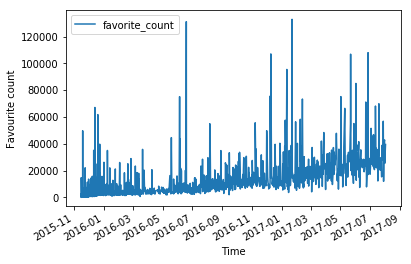

In [138]:
tweets.plot(x="timestamp",y="favorite_count")
plt.xlabel('Time')
plt.ylabel('Favourite count')

This graph shows the increasing number of favourite_count over the span of 2 years froom 2015 to 2017.

### Third Insight

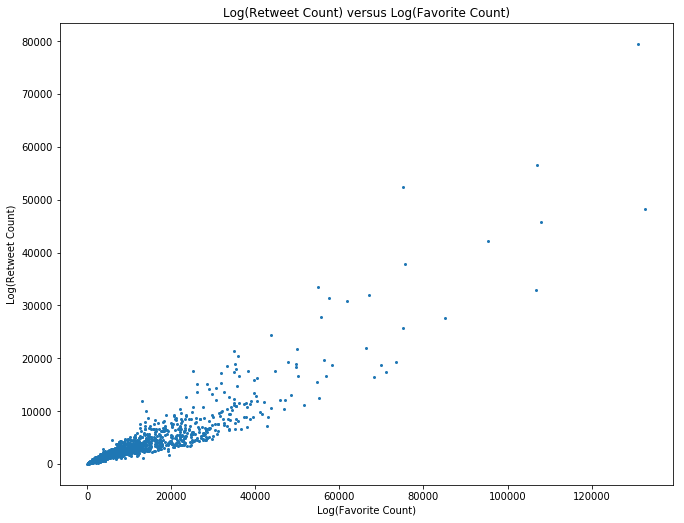

0.9129466274183698

In [148]:
to_log = ['favorite_count', 'retweet_count']
df_logged = twitter_archive_new[to_log]
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_logged.favorite_count, df_logged.retweet_count, marker='o', linestyle='', ms=2 )
plt.title('Log(Retweet Count) versus Log(Favorite Count)')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Log(Retweet Count)')
plt.show()
np.corrcoef(df_logged.retweet_count, df_logged.favorite_count)[0][1]

There is a very strong positive correlation between favourite count and retweet count. 